# IMOS South Australia Mooring map

### This is how you check if a package is installed or not.

In [3]:
import sys
'geopandas' in sys.modules

False

### This is how you install a package.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
#import cartopy

#from matplotlib import colormaps as cmaps
# Mapping
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# lat/long formaters - if starts with captial letter is an object in python
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Make table with mooring coordinates 
Coordinates taken from this [technical report](https://imos.org.au/fileadmin/user_upload/shared/ANMN/SA_Moorings/06c._Southern_Australia_Moorings_-_TS.pdf).

### South Australia Moorings

In [12]:
# create dataframe with coordinates
site = ['NRSKAI','SAM1DS', 'SAM2CP', 'SAM3MS', 'SAM4CY', 'SAM5CB', 'SAM6IS', 'SAM7DS', 'SAM8SG']
lat = [-35.83593, -36.5161, -35.26925, -36.1459, -36.5199, -34.9275, -35.5002, -36.1809, -35.25]
long = [136.44771, 136.2432, 135.68682, 135.904, 136.85502, 135.0098, 136.5998, 135.8439, 136.694]
nom_depth = [110, 500, 100, 170, 120, 95, 85, 100, 50]
status = ['Current', 'Discontinued', 'Discontinued', 'Discontinued', 'Discontinued', 'Current', 'Discontinued', 'Discontinued', 'Current']

df = pd.DataFrame({"site":site, "lat":lat, "long":long, "nominal depth":nom_depth, "status":status})
df

# turn into geodataframe
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.long, df.lat, crs="EPSG:4326"))
gdf

,site,lat,long,nominal depth,status,geometry
0,NRSKAI,-35.83593,136.44771,110,Current,POINT (136.44771 -35.83593)
1,SAM1DS,-36.51610,136.24320,500,Discontinued,POINT (136.24320 -36.51610)
2,SAM2CP,-35.26925,135.68682,100,Discontinued,POINT (135.68682 -35.26925)
3,SAM3MS,-36.14590,135.90400,170,Discontinued,POINT (135.90400 -36.14590)
4,SAM4CY,-36.51990,136.85502,120,Discontinued,POINT (136.85502 -36.51990)
5,SAM5CB,-34.92750,135.00980,95,Current,POINT (135.00980 -34.92750)
6,SAM6IS,-35.50020,136.59980,85,Discontinued,POINT (136.59980 -35.50020)
7,SAM7DS,-36.18090,135.84390,100,Discontinued,POINT (135.84390 -36.18090)
8,SAM8SG,-35.25000,136.69400,50,Current,POINT (136.69400 -35.25000)


<AxesSubplot:>

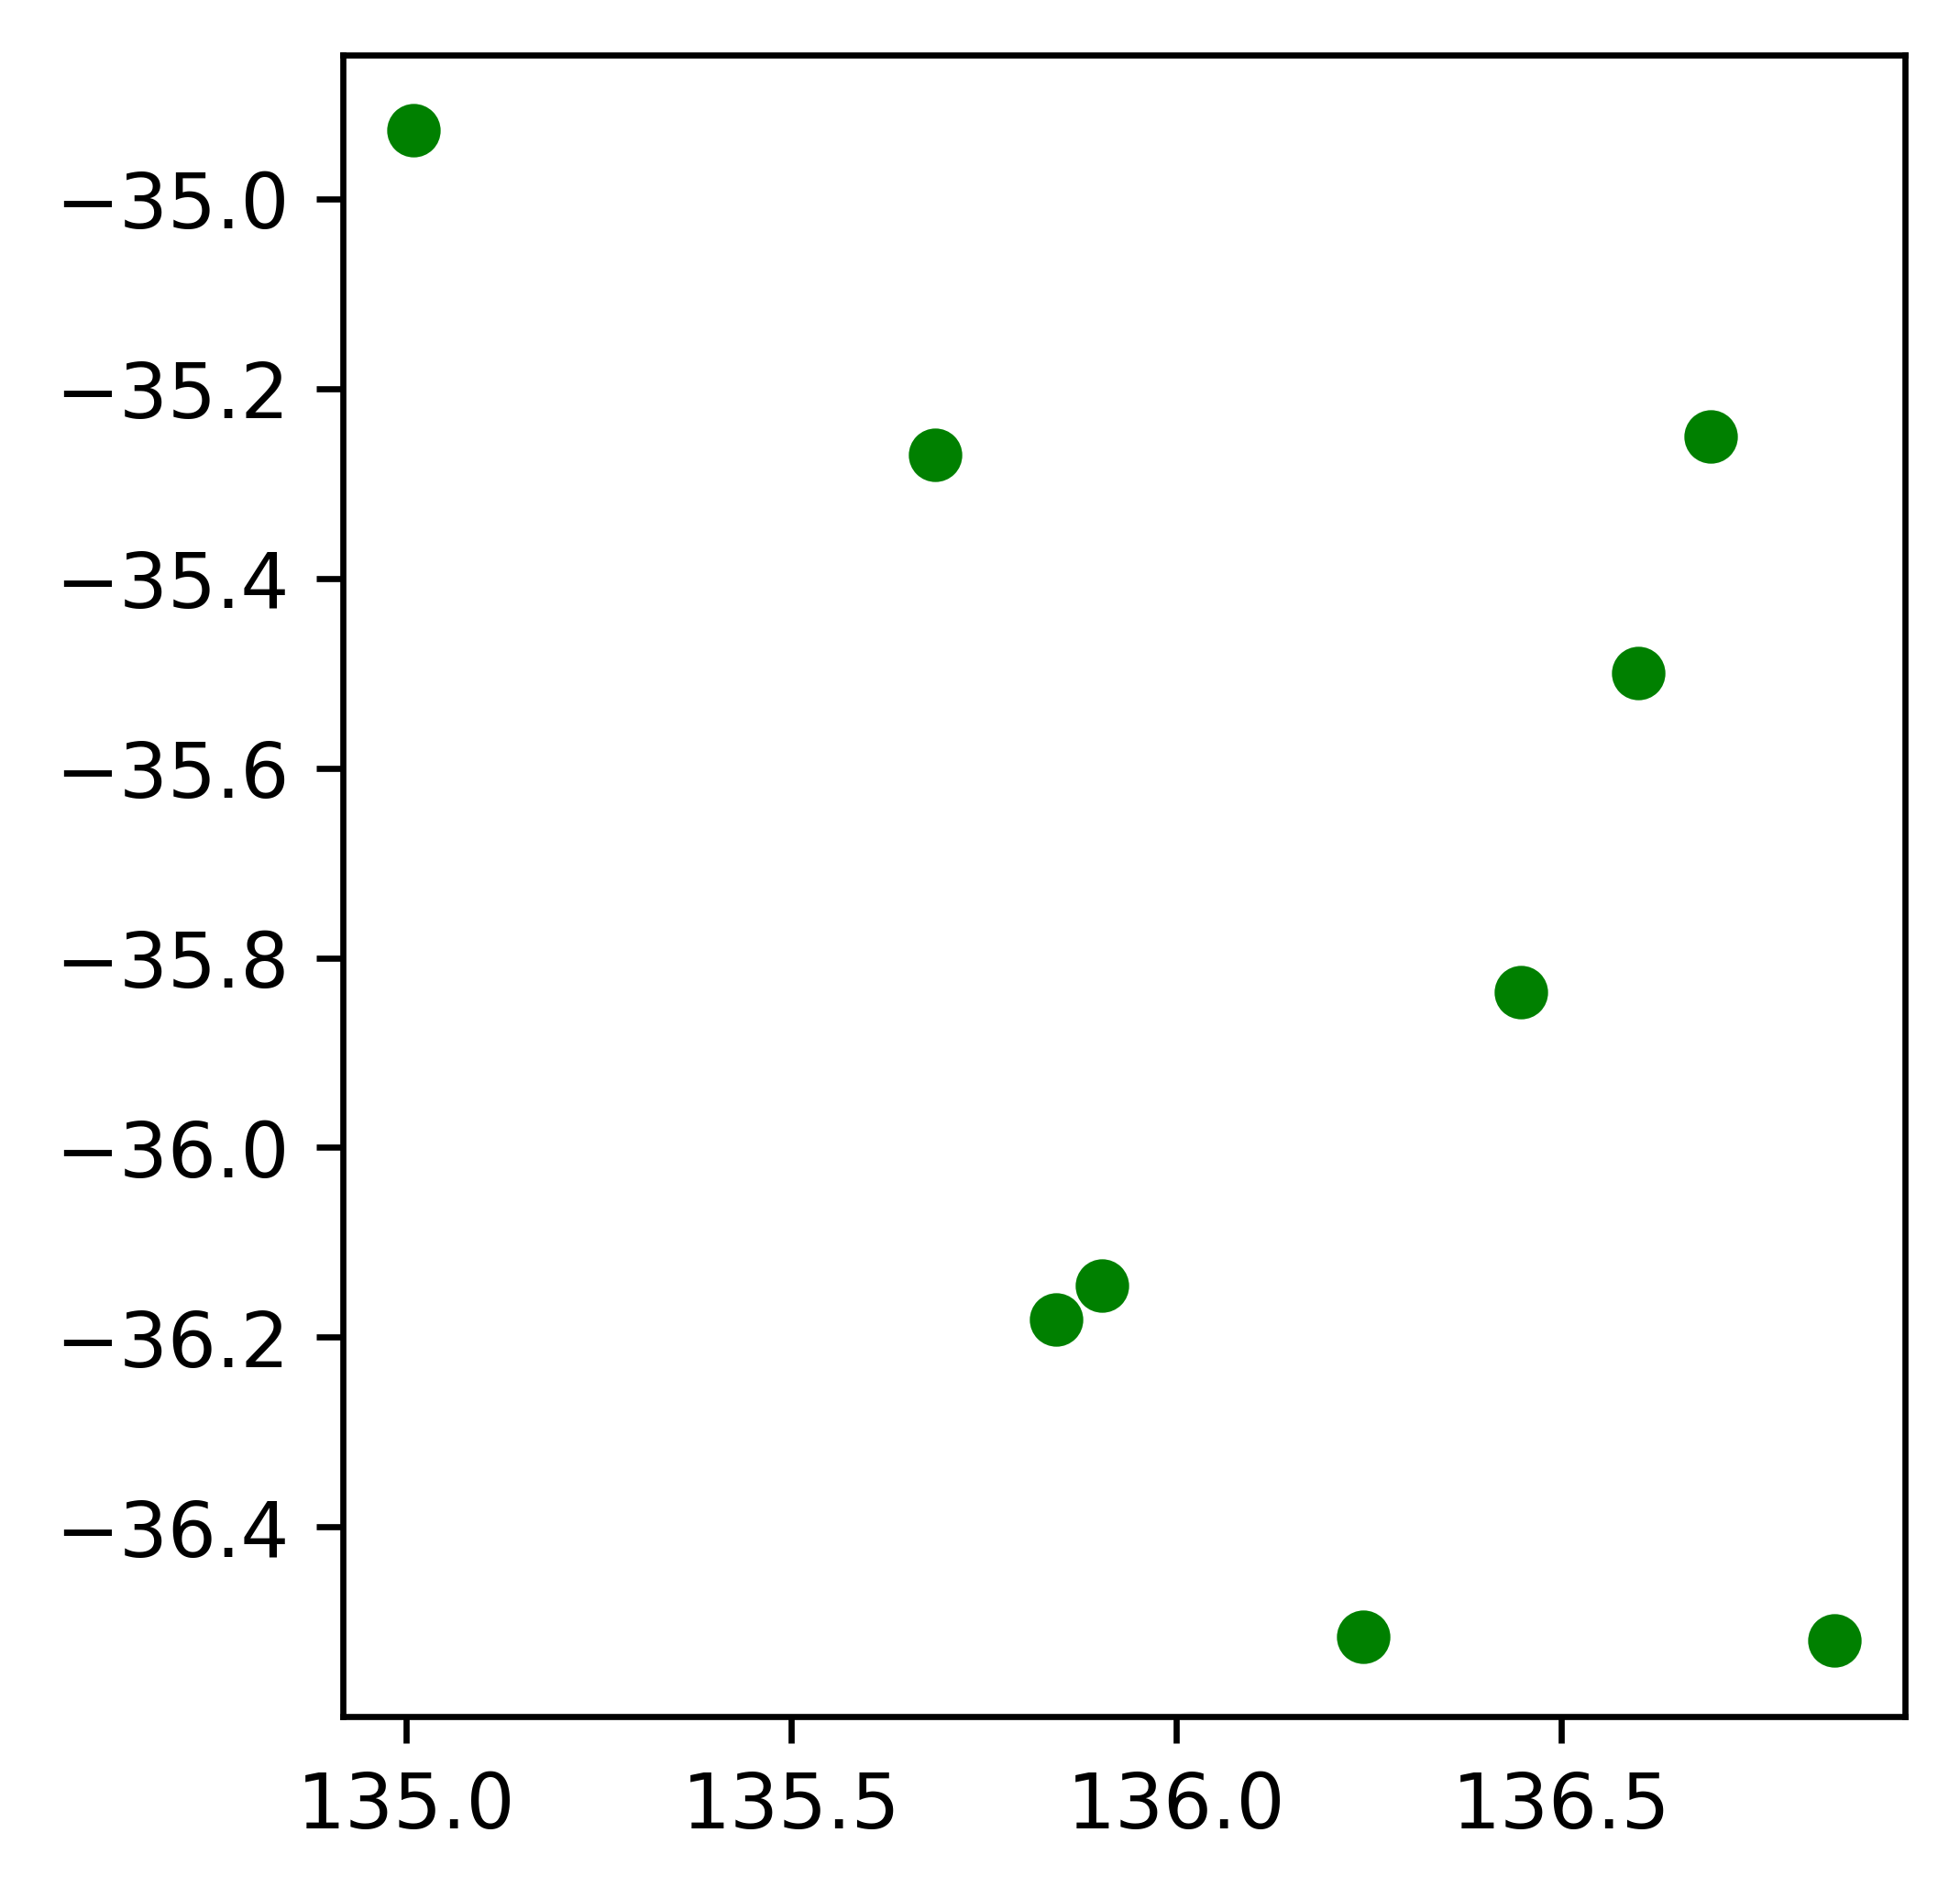

In [ ]:
gdf.plot(color = "green") # initial plot

In [56]:
# adjust lat/long columns to prevent overlapping labels for map
gdf_lab = gdf
gdf_lab
gdf_lab.iloc[7,1] = -36.4
gdf_lab.iloc[1,1] = -36.75
gdf_lab.iloc[1,2] = 135.8
gdf_lab

,site,lat,long,nominal depth,status,geometry
0,NRSKAI,-35.83593,136.44771,110,Current,POINT (136.44771 -35.83593)
1,SAM1DS,-36.75000,135.80000,500,Discontinued,POINT (136.24320 -36.51610)
2,SAM2CP,-35.26925,135.68682,100,Discontinued,POINT (135.68682 -35.26925)
3,SAM3MS,-36.14590,135.90400,170,Discontinued,POINT (135.90400 -36.14590)
4,SAM4CY,-36.51990,136.85502,120,Discontinued,POINT (136.85502 -36.51990)
5,SAM5CB,-34.92750,135.00980,95,Current,POINT (135.00980 -34.92750)
6,SAM6IS,-35.50020,136.59980,85,Discontinued,POINT (136.59980 -35.50020)
7,SAM7DS,-36.40000,135.84390,100,Discontinued,POINT (135.84390 -36.18090)
8,SAM8SG,-35.25000,136.69400,50,Current,POINT (136.69400 -35.25000)


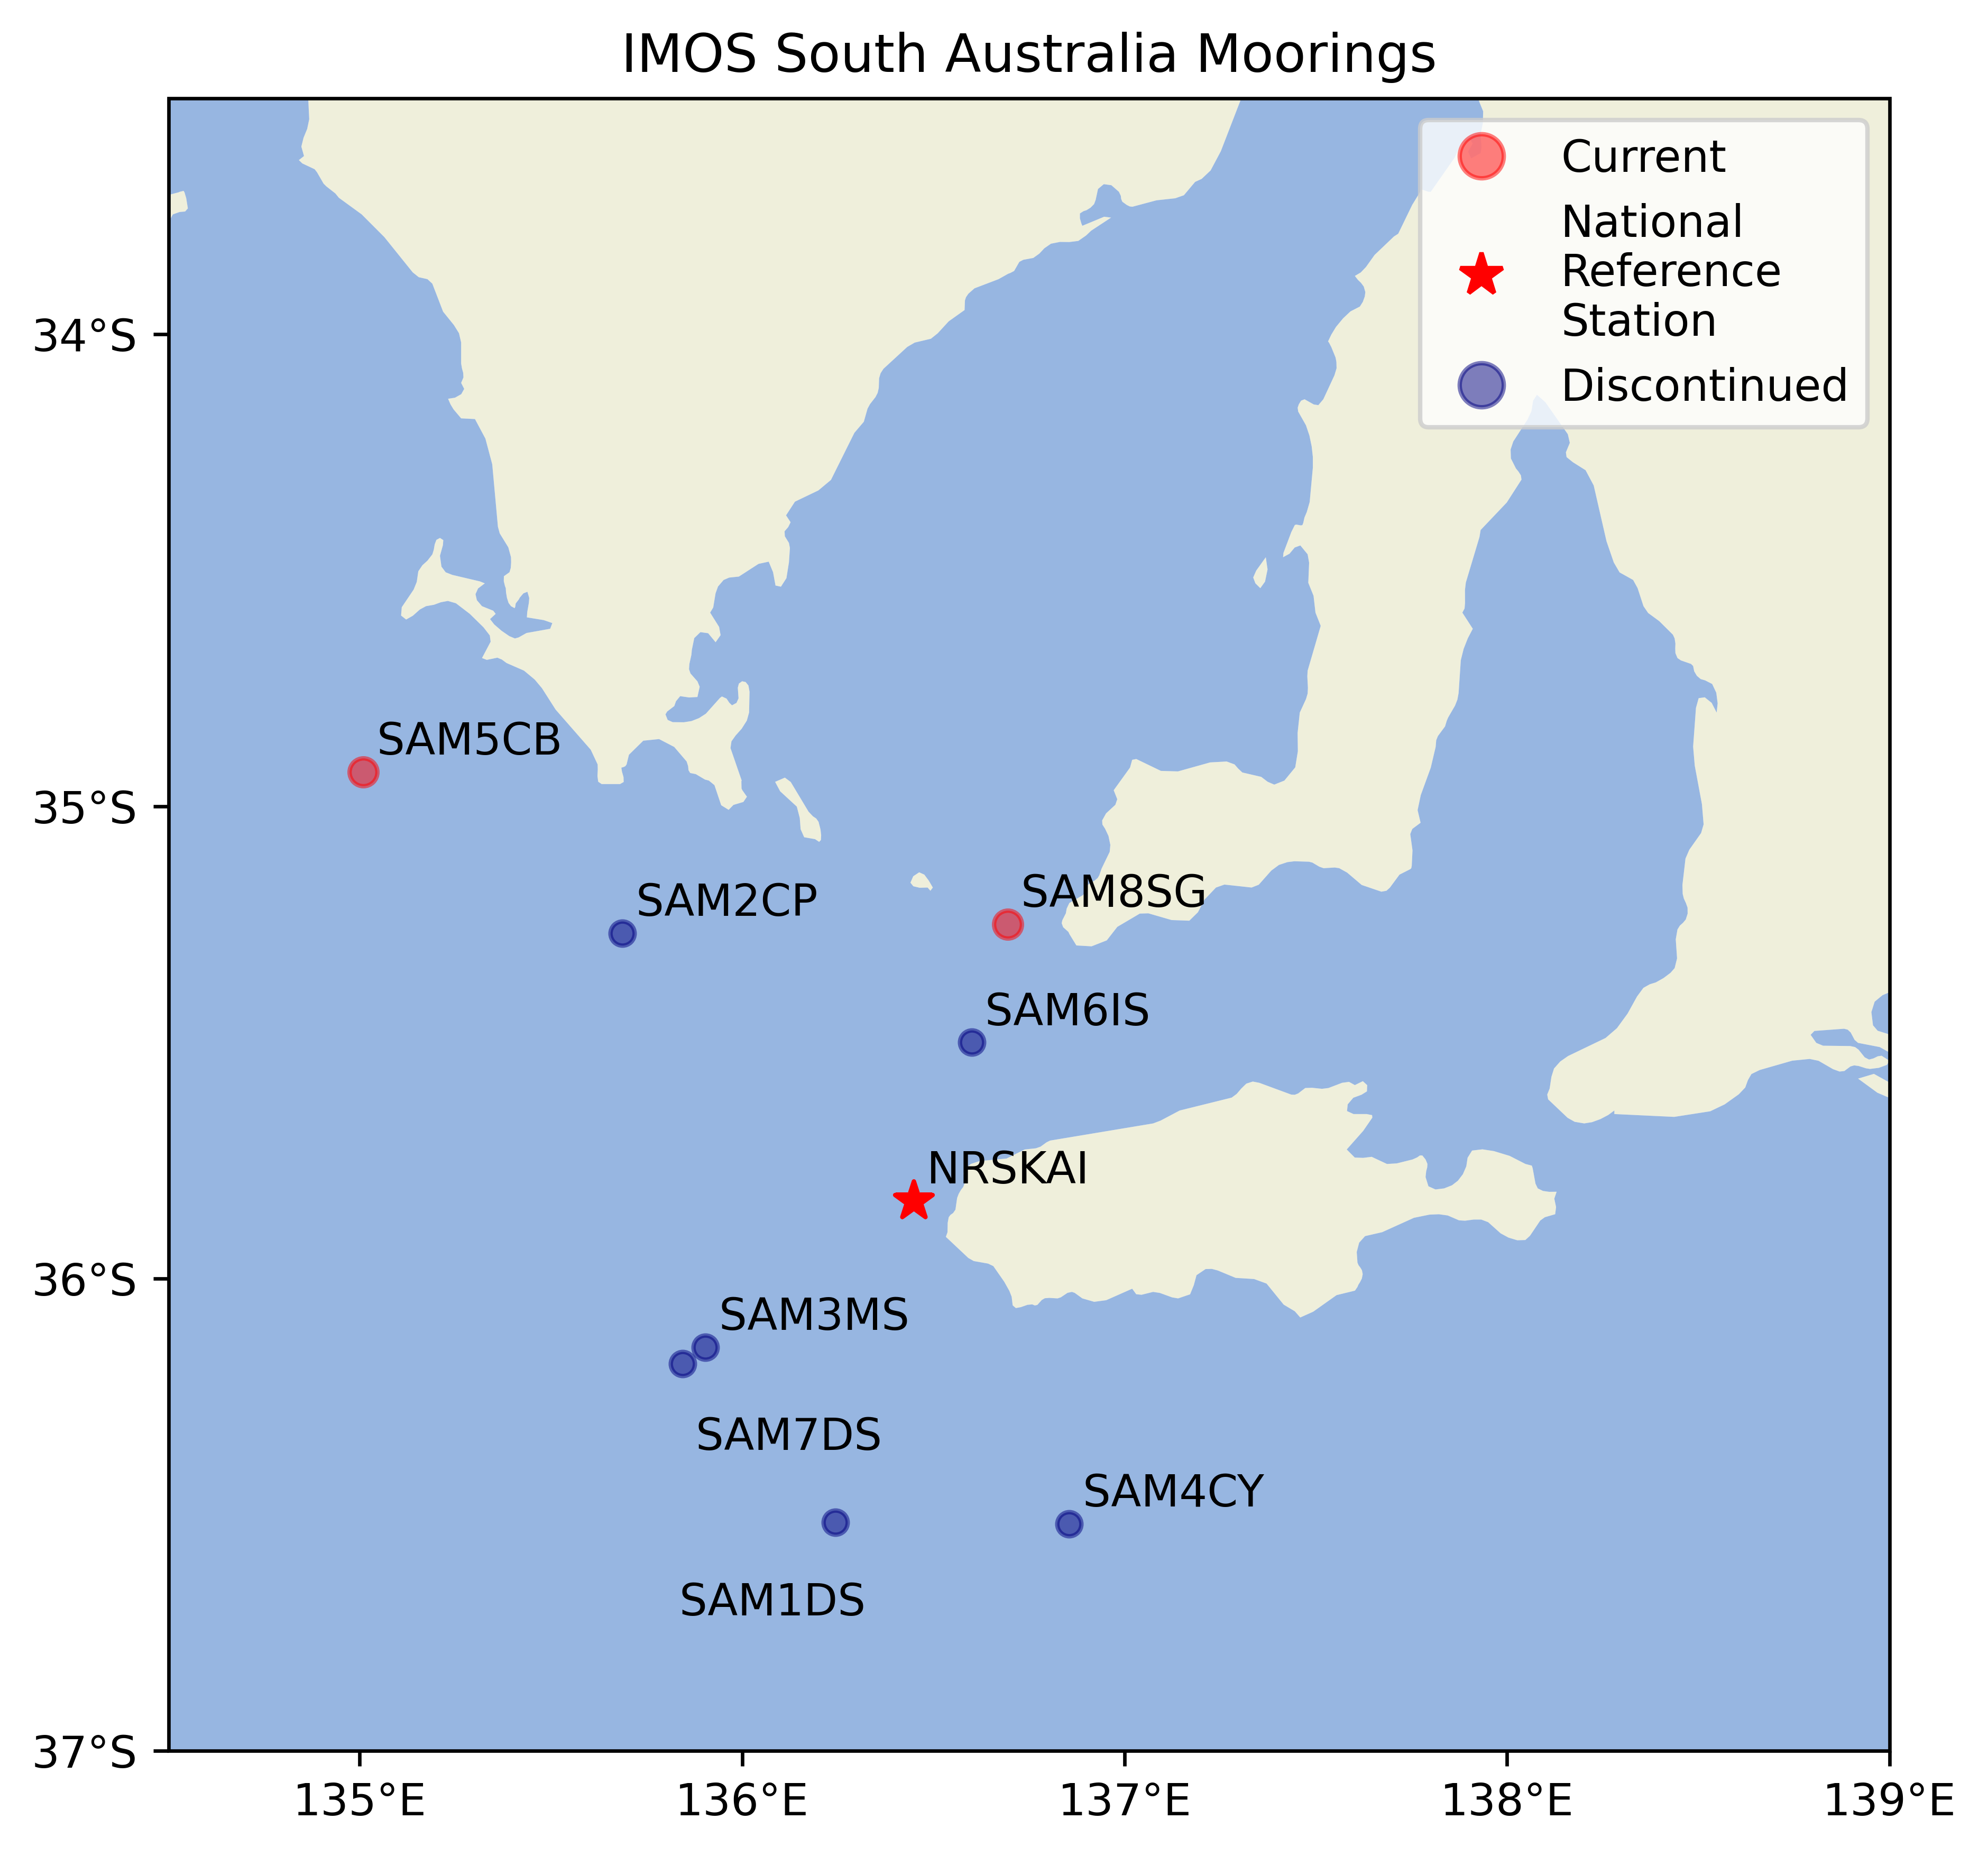

In [58]:
# Initialise the figure
fig = plt.figure(figsize=(7, 7)) 
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_xlim(134.5, 139)
ax.set_ylim(-37, -33.5)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)


# star marker for national reference station kangaroo island
gdf[gdf.site == 'NRSKAI'].plot(ax = ax, 
                                color = 'red', 
                                marker = "*", 
                                markersize = 80,
                                legend = True,
                                label = "NRS")
# plot current sites as red
current = gdf[(gdf.site == 'SAM5CB') | (gdf.site == 'SAM8SG')].plot(ax = ax, color = 'red', markersize = 40, alpha=0.5)
# discontinued sites as blue
discontinued = gdf[(gdf.site != 'SAM5CB') & (gdf.site != 'SAM8SG') & (gdf.site != 'NRSKAI')].plot(ax=ax, color = 'navy', markersize = 30, alpha=0.5)

red_dot= mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, alpha=0.5, label='Current')
red_star = mlines.Line2D([], [], color='red', marker='*', linestyle='None',
                          markersize=10, label='National\nReference\nStation')
blue_dot = mlines.Line2D([], [], color='navy', marker='o', linestyle='None',
                          markersize=10, alpha=0.5, label='Discontinued')
ax.legend(handles=[red_dot, red_star, blue_dot])

# add the lat/long tick marks on axes
# gca is get current axis to manaually set the tick values
plt.gca().set_yticks([-37, -36, -35, -34], crs=ccrs.PlateCarree()) #gca = get current axis
plt.gca().set_xticks([135, 136, 137, 138, 139], crs=ccrs.PlateCarree())

# formatter to have degrees N/S for lat/long
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Set plot title and labels
plt.title('IMOS South Australia Moorings')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

# label sites with adjusted lat long
for x, y, label in zip(gdf.long, gdf.lat, gdf.site):
    ax.annotate(label, xy=(x, y), xytext=(3, 4), textcoords="offset points")
    
plt.rcParams['figure.dpi'] = 600    
plt.gcf().savefig("../Figures/map_SAmooring.png") # save figure

### NSW Moorings

In [153]:
# create dataframe with coordinates
site = ['CH050','CH070', 'CH100', 'ORS065', 'SYD100', 'SYD140', 'NRSPHB', 'BMP070', 'BMP090','BMP120']
lat = [-30.310, -30.275, -30.268, -33.898, -33.943, -33.994, -34.119, -36.190, -36.190, -36.204]
long = [153.229, 153.300, 153.397, 151.315, 151.382, 151.459, 151.225, 150.188, 150.234, 150.317]
nom_depth = [50, 70, 100, 65, 100, 140, 100, 70, 90, 120]
status = ['Current', 'Current', 'Current', 'Current', 'Current', 'Current', 'Current', 'Current', 'Discontinued', 'Current']

df = pd.DataFrame({"site":site, "lat":lat, "long":long, "nominal depth":nom_depth, "status":status})
df

# turn into geodataframe
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.long, df.lat, crs="EPSG:4326"))
gdf

,site,lat,long,nominal depth,status,geometry
0,CH050,-30.310,153.229,50,Current,POINT (153.22900 -30.31000)
1,CH070,-30.275,153.300,70,Current,POINT (153.30000 -30.27500)
2,CH100,-30.268,153.397,100,Current,POINT (153.39700 -30.26800)
3,ORS065,-33.898,151.315,65,Current,POINT (151.31500 -33.89800)
4,SYD100,-33.943,151.382,100,Current,POINT (151.38200 -33.94300)
5,SYD140,-33.994,151.459,140,Current,POINT (151.45900 -33.99400)
6,NRSPHB,-34.119,151.225,100,Current,POINT (151.22500 -34.11900)
7,BMP070,-36.190,150.188,70,Current,POINT (150.18800 -36.19000)
8,BMP090,-36.190,150.234,90,Discontinued,POINT (150.23400 -36.19000)
9,BMP120,-36.204,150.317,120,Current,POINT (150.31700 -36.20400)


In [ ]:
# adjust lat/long columns to prevent overlapping labels for map
gdf_lab = gdf
gdf_lab

gdf_lab.iloc[0,1] = -30.33
gdf_lab.iloc[0,2] = 152.7
gdf_lab.iloc[1,1] = -30.07
gdf_lab.iloc[1,2] = 152.75

#gdf_lab.iloc[7,1] = -35.98
#gdf_lab.iloc[7,2] = 150.1
#gdf_lab.iloc[8,1] = -36.21
#gdf_lab.iloc[8,2] = 150.17
#gdf_lab.iloc[9,1] = -36.1
#gdf_lab.iloc[9,2] = 150.33
#gdf_lab.iloc[3,1] = -33.7
#gdf_lab.iloc[3,2] = 150.6
#gdf_lab.iloc[4,1] = -33.78
#gdf_lab.iloc[5,1] = -33.91
gdf_lab

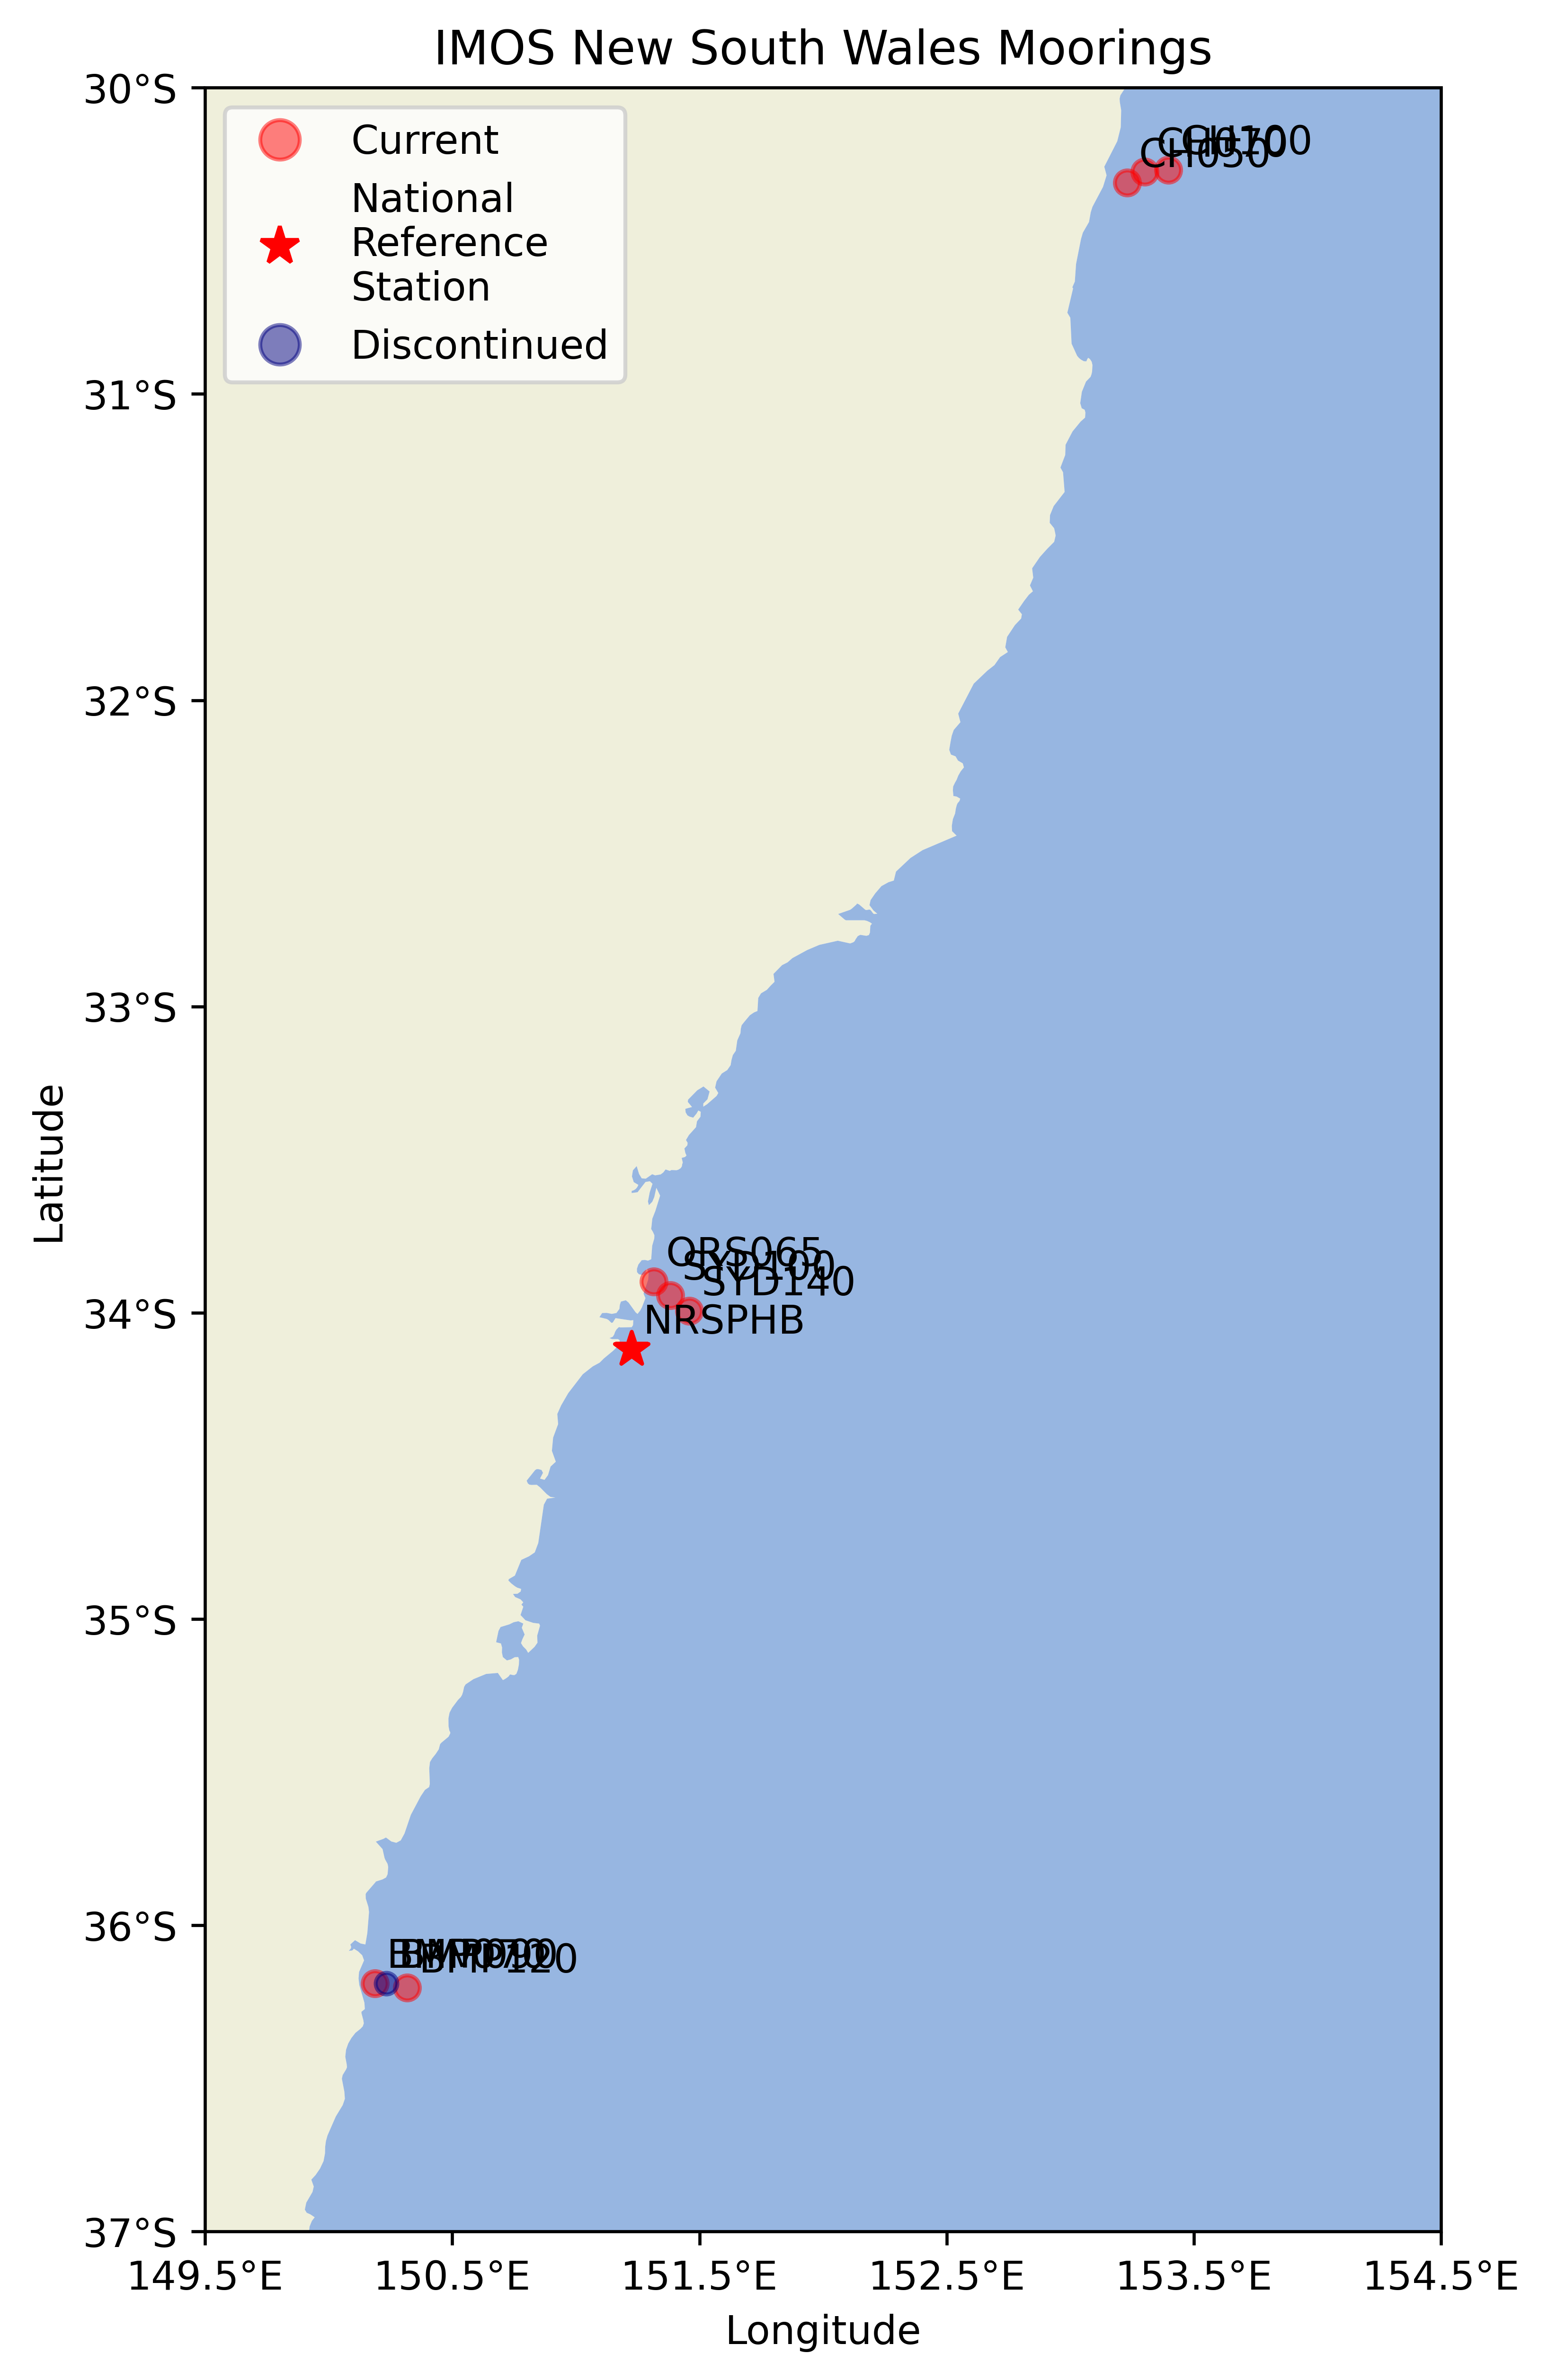

In [154]:
# Initialise the figure
fig = plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_xlim(149.5, 154.5)
ax.set_ylim(-37, -30)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)

# star marker for national reference station kangaroo island
gdf[gdf.site == 'NRSPHB'].plot(ax = ax, 
                                color = 'red', 
                                marker = "*", 
                                markersize = 80,
                                legend = True,
                                label = "NRS")
# plot current sites as red
current = gdf[(gdf.site != 'BMP090') & (gdf.site != 'NRSPHB')].plot(ax = ax, color = 'red', markersize = 40, alpha=0.5)
# discontinued sites as blue
discontinued = gdf[(gdf.site == 'BMP090')].plot(ax=ax, color = 'navy', markersize = 30,alpha=0.5)

red_dot= mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, alpha=0.5, label='Current')
red_star = mlines.Line2D([], [], color='red', marker='*', linestyle='None',
                          markersize=10, label='National\nReference\nStation')
blue_dot = mlines.Line2D([], [], color='navy', marker='o', alpha=0.5, linestyle='None',
                          markersize=10, label='Discontinued')
ax.legend(handles=[red_dot, red_star, blue_dot])

# add the lat/long tick marks on axes
# gca is get current axis to manaually set the tick values
plt.gca().set_yticks([-37, -36, -35, -34, -33, -32, -31, -30], crs=ccrs.PlateCarree()) #gca = get current axis
plt.gca().set_xticks([149.5, 150.5, 151.5, 152.5, 153.5, 154.5], crs=ccrs.PlateCarree())

# formatter to have degrees N/S for lat/long
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Set plot title and labels
plt.title('IMOS New South Wales Moorings')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

# label sites with adjusted lat long
for x, y, label in zip(gdf.long, gdf.lat, gdf.site):
    ax.annotate(label, xy=(x, y), xytext=(3, 4), textcoords="offset points")
    
plt.rcParams['figure.dpi'] = 600      

### WA Moorings